# This notebook plots an example of the data used in the experiment, as well as illustrating the add-on features (Altitiude map and land/sea mask)

### Imports for plotting and loading tiff-data

In [1]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import collections  as mc
import cartopy.crs as ccrs
import cartopy.feature as cf
#import rioxarray as rxr
import torch


### Opening a random sequence of files to plot

In [2]:
file1 = './data/Data2021/2021_11_26/S_NWC_CMA_MSG4_globeM-VISIR_20211126T083000Z_4dcc7a6a8c7eaf55c00bbb2884fc3057.nc'
file2 = './data/Data2021/2021_11_26/S_NWC_CMA_MSG4_globeM-VISIR_20211126T084500Z_4dcc7a6a8c7eaf55c00bbb2884fc3057.nc'
file3 = './data/Data2021/2021_11_26/S_NWC_CMA_MSG4_globeM-VISIR_20211126T090000Z_4dcc7a6a8c7eaf55c00bbb2884fc3057.nc'
path = './data/Data2021/2021_09_01'
files = sorted(os.listdir(path), key=lambda x: int(x.split("_")[5][9:-1]))
rand_file_idx = np.random.randint(97)
rand_file = "./data/Data2021/2021_09_01/" + files[rand_file_idx]

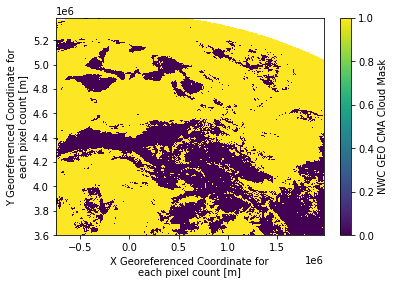

In [3]:
dat =  xr.open_dataset(rand_file, engine="h5netcdf", decode_cf = True)
dat.cma.plot()
output_area = dat.cma[140+64:396-64,342+64:598-64]
input_area = dat.cma[140:396,342:598]

### Making a plot grid of clouds

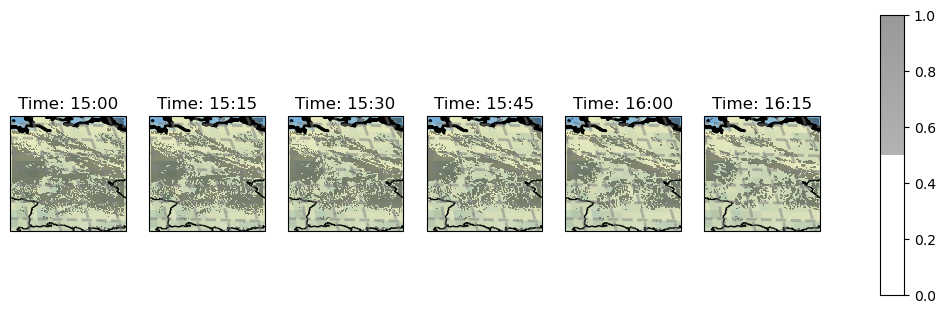

In [4]:
#Random sequence

times = ["00:00", "00:15", "00:30", "00:45",
        "01:00", "01:15", "01:30", "01:45",
        "02:00", "02:15", "02:30", "02:45",
        "03:00", "03:15", "03:30", "03:45",
        "04:00", "04:15", "04:30", "04:45",
        "05:00", "05:15", "05:30", "05:45",
        "06:00", "06:15", "06:30", "06:45",
        "07:00", "07:15", "07:30", "07:45",
        "08:00", "08:15", "08:30", "08:45",
        "09:00", "09:15", "09:30", "09:45",
        "10:00", "10:15", "10:30", "10:45",
        '11:00', '11:15', '11:30', '11:45',
         '12:00', '12:15', '12:30', '12:45',
         '13:00', '13:15', '13:30', '13:45',
         '14:00', '14:15', '14:30', '14:45',
         '15:00', '15:15', '15:30', '15:45',
         '16:00', '16:15', '16:30', '16:45',
         '17:00', '17:15', '17:30', '17:45',
         '18:00', '18:15', '18:30', '18:45',
         '19:00', '19:15', '19:30', '19:45',
         '20:00', '20:15', '20:30', '20:45',
         '21:00', '21:15', '21:30', '21:45',
         '22:00', '22:15', '22:30', '22:45',
         '23:00', '23:15', '23:30', '23:45']
# Generating a modified colormap with transparency
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 600
color_array = plt.get_cmap('gray_r')(range(ncolors))

# change alpha values
#color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
thr = 300
color_array[0:thr,-1] = 0
color_array[thr:,-1] = np.linspace(0.3,0.4,(ncolors-thr))
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='cloud_aplha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

data_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())
map_proj = data_proj

 
j=60
fig, axis = plt.subplots(1,6, figsize=(12,4), dpi=100, subplot_kw=dict(projection=map_proj))
for i,ax in enumerate(axis.flatten()):
    ax.set_extent([7.76, 12.2, 47.45, 54.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
    ax.stock_img()
    dat =  xr.open_dataset(path + "/" +files[j+i], engine="h5netcdf", decode_cf = True)
    small = dat.cma[140+64:396-64,342+64:598-64]
    im = small.plot(transform = data_proj, cmap='cloud_aplha', add_colorbar=False, ax = ax)
    ax.set_title('Time: {time}'.format(time = times[j+i]))

    ax.add_feature(cf.COASTLINE, lw=2)
    ax.add_feature(cf.BORDERS)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.20, 0.02, 0.7]) #Adjustment from right, adjustment from top, width of CB, height of CB
fig.colorbar(im, cax=cbar_ax)
plt.show()


In [ ]:
'''
path = './data/Data2021/2021_11_13'
files = sorted(os.listdir(path), key=lambda x: int(x.split("_")[5][9:-1]))

for j in range(0,97-6,6):
    fig, axis = plt.subplots(1,6, figsize=(12,4), dpi=100, subplot_kw=dict(projection=map_proj))
    for i,ax in enumerate(axis.flatten()):
        ax.set_extent([7.76, 12.2, 47.45, 54.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
        ax.stock_img()
        dat =  xr.open_dataset(path + "/" +files[j+i], engine="h5netcdf", decode_cf = True)
        small = dat.cma[140+64:396-64,342+64:598-64]
        im = small.plot(transform = data_proj, cmap='cloud_aplha', add_colorbar=False, ax = ax)
        ax.set_title('Time: {time}'.format(time = times[j+i]))

        ax.add_feature(cf.COASTLINE, lw=2)
        ax.add_feature(cf.BORDERS)
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.20, 0.02, 0.7]) #Adjustment from right, adjustment from top, width of CB, height of CB
    fig.colorbar(im, cax=cbar_ax)
plt.show()
'''

'\npath = \'./data/Data2021/2021_11_13\'\nfiles = sorted(os.listdir(path), key=lambda x: int(x.split("_")[5][9:-1]))\n\nfor j in range(0,97-6,6):\n    fig, axis = plt.subplots(1,6, figsize=(12,4), dpi=100, subplot_kw=dict(projection=map_proj))\n    for i,ax in enumerate(axis.flatten()):\n        ax.set_extent([7.76, 12.2, 47.45, 54.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)\n        ax.stock_img()\n        dat =  xr.open_dataset(path + "/" +files[j+i], engine="h5netcdf", decode_cf = True)\n        small = dat.cma[140+64:396-64,342+64:598-64]\n        im = small.plot(transform = data_proj, cmap=\'cloud_aplha\', add_colorbar=False, ax = ax)\n        ax.set_title(\'Time: {time}\'.format(time = times[j+i]))\n\n        ax.add_feature(cf.COASTLINE, lw=2)\n        ax.add_feature(cf.BORDERS)\n        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,\n                      linewidth=2, color=\'gray\', alpha=0.5, linestyle=\'--\')\n\n 

### Plotting altitude map

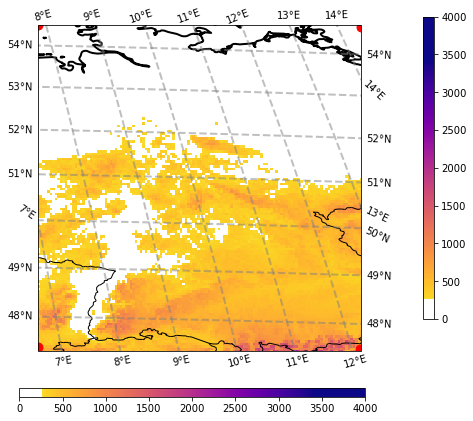

In [5]:
altitude = np.load("MoreData/Altitude.npy")
altitude1 = np.load("data/TestData/Altitude.npy")
np.allclose(altitude,altitude1)

#Input_area used as georeference placeholder
geo_altitude = input_area.copy()
geo_altitude.data = altitude

##########################################################
# Generating a modified colormap with transparency
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 300
color_array = plt.get_cmap('plasma_r')(range(ncolors))

# change alpha values
#color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
#thr = 120
color_array[0:20,-1] = 0
#color_array[105:185,-1] = np.linspace(0.3,1.0,80)
#color_array[215:295,-1] = np.linspace(0.3,1.0,80)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha_mads_a',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)


data_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())
map_proj = data_proj

fig = plt.figure(figsize=(8,6))

ax = plt.axes(projection=map_proj)
ax.set_extent([7.83, 12.15, 47.45, 54.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
#ax.stock_img()
#ax.set_extent([4.5, 14.8, 44, 59], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
im = geo_altitude.plot(transform = data_proj, cmap='rainbow_alpha_mads_a', add_colorbar=False, vmin=0, vmax=4000)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

plt.scatter(x = 7.83, y = 54.5, color="red", s=80, transform = ccrs.PlateCarree()) #Top-left corner
plt.scatter(x = 6.61, y = 47.4, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-left corner
plt.scatter(x = 12.15, y = 47.5, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-right corner
plt.scatter(x = 14.5, y = 54.7, color="red", s=80, transform = ccrs.PlateCarree()) # Top-right

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.15, 0.02, 0.6, 0.02]) #Adjustment from right, adjustment from top, width of CB, height of CB
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

cbar_ax1 = fig.add_axes([0.85, 0.20, 0.02, 0.7]) #Adjustment from right, adjustment from top, width of CB, height of CB
fig.colorbar(im, cax=cbar_ax1)
plt.show()

# Plotting altitude map

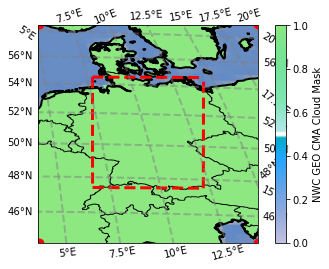

In [6]:
LM = np.load("MoreData/LandSea.npy")
LM1 = np.load("data/TestData/LandSea.npy")
np.allclose(LM,LM1)

#Input_area used as georeference placeholder
LM_p = input_area.copy()
LM_p.data = LM

##########################################################
# Generating a modified colormap with transparency
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 100
color_array = plt.get_cmap('terrain')(range(ncolors))

# change alpha values
#color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
#thr = 120
color_array[49:51,-1] = 0
color_array[0:49,-1] = np.linspace(0.3,1.0,49)
color_array[51:100,-1] = np.linspace(0.3,1.0,49)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='landsea',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

#Lines to make box
lines = [[(7.83, 54.5), (14.5, 54.7)], [(7.83, 54.5), (6.61, 47.4)], [(6.61, 47.4), (12.15, 47.5)],[(12.15, 47.5), (14.5,54.7)]]
lc = mc.LineCollection(lines, linewidths=3, color = "r", linestyle="--", transform = ccrs.PlateCarree())

data_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())
map_proj = data_proj
ax = plt.axes(projection=map_proj)
#ax.set_extent([7.76, 12.2, 47.45, 54.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
ax.set_extent([5.2, 14.05, 44.55, 58.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
ax.stock_img()
ax.add_collection(lc)
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
LM_p.plot(transform = data_proj, cmap='landsea')
plt.scatter(x = 5.278151413236939, y = 58.62858511635695, color="red", s=80, transform = ccrs.PlateCarree()) #Top-left corner
plt.scatter(x = 3.715224194668945, y = 44.285549828485195, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-left corner
plt.scatter(x = 14.036919170158745, y = 44.52281739161824, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-right corner
plt.scatter(x = 20.518835840591922, y = 59.28848849319079, color="red", s=80, transform = ccrs.PlateCarree()) # Top-right
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


# Putting it all together

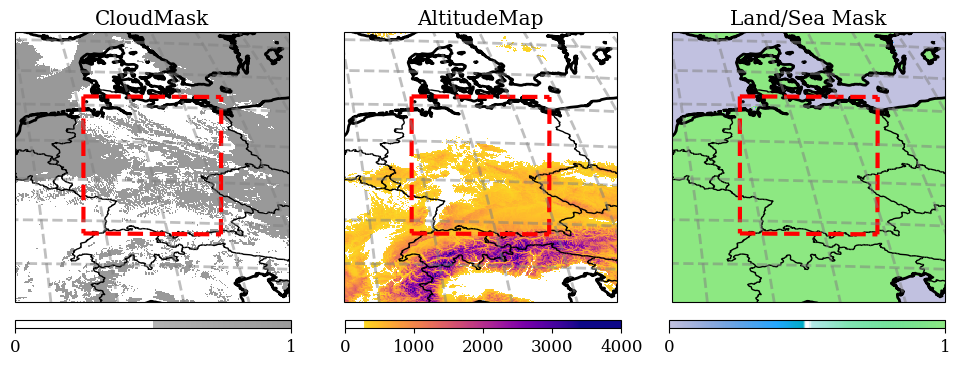

In [9]:
#plt.rc('text', usetex=True)
plt.rc('font', family='DejaVu serif')
plt.rc('font', size = 12)
#Lines to make box
lines = [[(7.83, 54.5), (14.5, 54.7)], [(7.83, 54.5), (6.61, 47.4)], [(6.61, 47.4), (12.15, 47.5)],[(12.15, 47.5), (14.5,54.7)]]
lc1 = mc.LineCollection(lines, linewidths=3, color = "r", linestyle="--", transform = ccrs.PlateCarree())
lc2 = mc.LineCollection(lines, linewidths=3, color = "r", linestyle="--", transform = ccrs.PlateCarree())
lc3 = mc.LineCollection(lines, linewidths=3, color = "r", linestyle="--", transform = ccrs.PlateCarree())
fig, axis = plt.subplots(1,3, figsize=(12,4), dpi=100, subplot_kw=dict(projection=map_proj))
for i,ax in enumerate(axis.flatten()):
    ax.set_extent([5.2, 14.05, 44.55, 58.5], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
    #ax.stock_img()
    dat =  xr.open_dataset(path + "/" +files[j+i], engine="h5netcdf", decode_cf = True)
    large = dat.cma[140:396,342:598]
    if i == 0:
        im1 = large.plot(transform = data_proj, cmap='cloud_aplha', add_colorbar=False, ax = ax)
        ax.set_title("CloudMask")
        ax.add_collection(lc1)
    if i == 1:
        im2 = geo_altitude.plot(transform = data_proj, cmap='rainbow_alpha_mads_a', add_colorbar=False,vmin=0, vmax=4000, ax=ax)
        ax.set_title("AltitudeMap")
        ax.add_collection(lc2)
    if i == 2:
        im3 = LM_p.plot(transform = data_proj, cmap='landsea', add_colorbar=False, ax=ax)
        ax.set_title("Land/Sea Mask")
        ax.add_collection(lc3)
    ax.add_feature(cf.COASTLINE, lw=2)
    ax.add_feature(cf.BORDERS)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


cbar_ax = fig.add_axes([0.125, 0.1, 0.23, 0.02]) #Adjustment from right, adjustment from top, width of CB, height of CB
fig.colorbar(im1, cax=cbar_ax, orientation='horizontal', ticks = [0,1])

cbar_ax2 = fig.add_axes([0.4, 0.1, 0.23, 0.02]) #Adjustment from right, adjustment from top, width of CB, height of CB
fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')

cbar_ax3 = fig.add_axes([0.67, 0.1, 0.23, 0.02]) #Adjustment from right, adjustment from top, width of CB, height of CB
fig.colorbar(im3, cax=cbar_ax3, orientation='horizontal', ticks = [0,1])

plt.savefig("DataPlot.pdf")
plt.show()
